## Converting a RAW file to a standard image format
In this notebook we read and process a RAW image and save it in a standard image format. The sample image used here can be found on rawsamples.ch.
* https://www.rawsamples.ch/raws/nikon/d3x/RAW_NIKON_D3X.NEF
* https://www.rawsamples.ch/

Example from:
* https://github.com/letmaik/rawpy-notebooks/blob/master/README.md
* https://nbviewer.jupyter.org/github/letmaik/rawpy-notebooks/blob/master/simple-convert/simple-convert.ipynb

#### Adapted to read image from Sony dataset

### Imports
For displaying images in this notebook we first import matplotlib.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 5, 10
from matplotlib.pyplot import imshow

The actual conversion is done with rawpy and Pillow which are imported below.

In [2]:
import rawpy
import PIL

#### Some install stuff to show versions due to issues getting rawpi installed on jupyter
Turned out to be an issue with the version of python jupyter was running

In [3]:
import numpy
numpy.version.version

'1.18.1'

In [4]:
import sys
sys.executable

'/usr/bin/python3'

In [5]:
from platform import python_version
print(python_version())

3.6.9


## Opening the RAW image
Opening a RAW image is as simple as calling rawpy.imread.

In [34]:
# raw = rawpy.imread('./RAW_NIKON_D3X.NEF')
#raw = rawpy.imread('../Learning-to-See-in-the-Dark-master/dataset/Sony/long/00001_00_10s.ARW')
raw = rawpy.imread('../S7-ISP-Dataset/20161107_233033/medium_exposure.dng')

Note that imread() behaves similar to Python's built-in open() function, meaning that the opened file has to be closed again later on.
* http://pythonhosted.org/rawpy/api/index.html#rawpy.imread

## Processing the RAW image
When processing RAW images we have to decide how to handle the white balance. A common option is to just use the white balance values that are stored in the RAW image when the picture was shot. To do that, the use_camera_wb parameter has to be set to True.

In [35]:
rgb = raw.postprocess(use_camera_wb=True)

The return value of postprocess() is a numpy array which we can display with matplotlib's imshow() function.
* https://letmaik.github.io/rawpy/api/rawpy.RawPy.html#rawpy.RawPy.postprocess

In [36]:
print(rgb.dtype, rgb.shape)

uint8 (3024, 4032, 3)


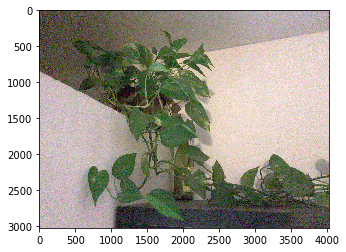

In [37]:
plt.imshow(rgb)

If the camera white balance does not look right, then it can also be estimated from the image itself with the use_auto_wb parameter.
* https://letmaik.github.io/rawpy/api/rawpy.Params.html

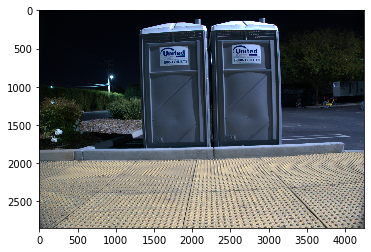

In [28]:
rgb2 = raw.postprocess(use_auto_wb=True)
plt.imshow(rgb2)

In this example the white balance values stored from the camera look more natural, so we will use the first version.

By default, rawpy applies several colour and brightness corrections to the RAW image which then lead to good output images for normal photography. However, here we need to disable all those corrections since we want to determine those ourselves based on the unmodified linear sensor data. The relevant parameters are output_color, gamma, user_wb, and no_auto_bright:

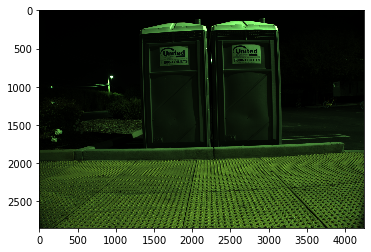

In [29]:
rgb_base_linear = raw.postprocess(output_color=rawpy.ColorSpace.raw, gamma=(1, 1),
                                       user_wb=[1.0, 1.0, 1.0, 1.0], no_auto_bright=True)
plt.imshow(rgb_base_linear)

### Raw Image
* https://letmaik.github.io/rawpy/api/rawpy.RawPy.html#rawpy.RawPy.raw_image

(2848, 4288)

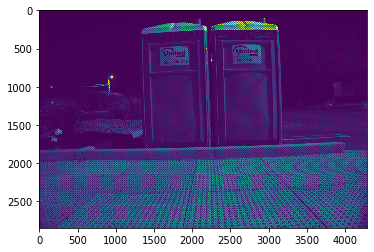

In [30]:
plt.imshow(raw.raw_image)
raw.raw_image.shape

## Saving the processed image
Saving the processed image (a numpy array) in a standard format is easily done with Pillow.



In [31]:
PIL.Image.fromarray(rgb).save('image.jpg', quality=90, optimize=True)

In [32]:
PIL.Image.fromarray(rgb).save('image.tiff')

In [33]:
PIL.Image.fromarray(rgb).save('image.png')

## Closing the RAW image
It is important to close the RAW image again after we are done with processing.



In [15]:
raw.close()

## Using context managers
rawpy also supports context managers for opening/closing RAW images. In that case, the conversion code would look like below.
* https://en.wikibooks.org/wiki/Python_Programming/Context_Managers

In [16]:
with rawpy.imread('../Learning-to-See-in-the-Dark-master/dataset/Sony/long/00001_00_10s.ARW') as raw:
    rgb = raw.postprocess(use_camera_wb=True)
PIL.Image.fromarray(rgb).save('image.jpg')

# importing-png-files-into-numpy
* https://stackoverflow.com/questions/31386096/importing-png-files-into-numpy/47044303#47044303

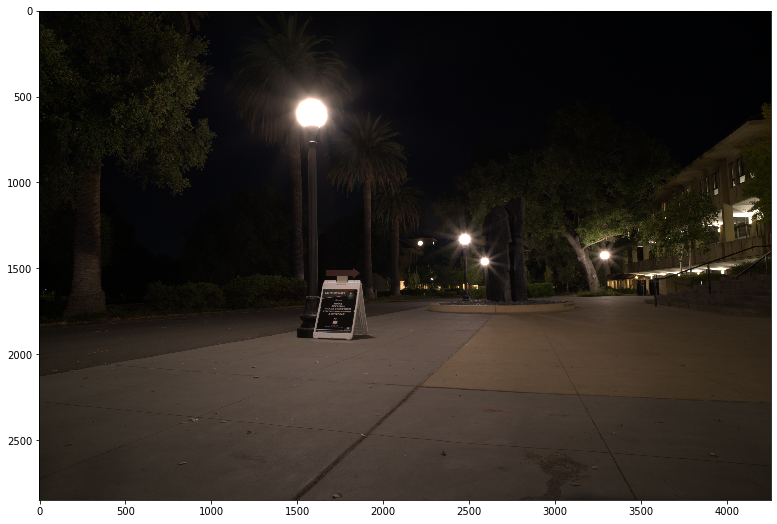

In [17]:
plt.figure(figsize=(16,9))
im_frame = PIL.Image.open('../Learning-to-See-in-the-Dark-master/result_Sony/final/10126_00_300_gt.png')
# np_frame = np.array(im_frame.getdata())
plt.imshow(im_frame)
plt.show()

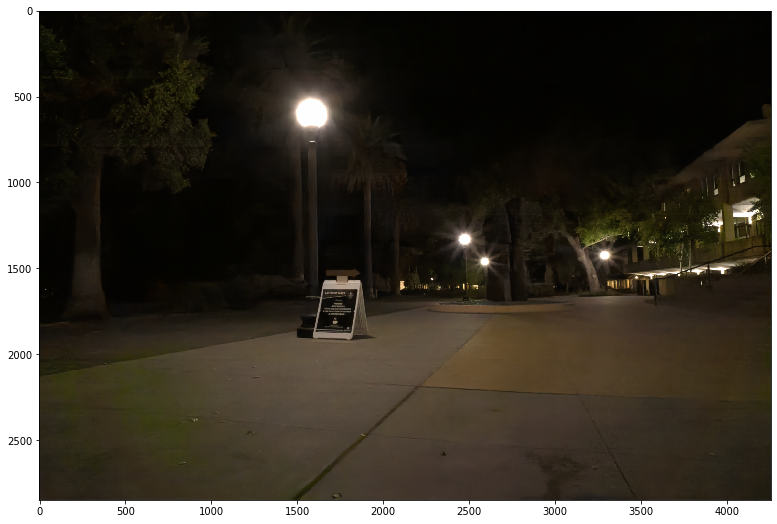

In [18]:
plt.figure(figsize=(16,9))
im_frame = PIL.Image.open('../Learning-to-See-in-the-Dark-master/result_Sony/final/10126_00_300_out.png')
# np_frame = np.array(im_frame.getdata())
plt.imshow(im_frame)
plt.show()

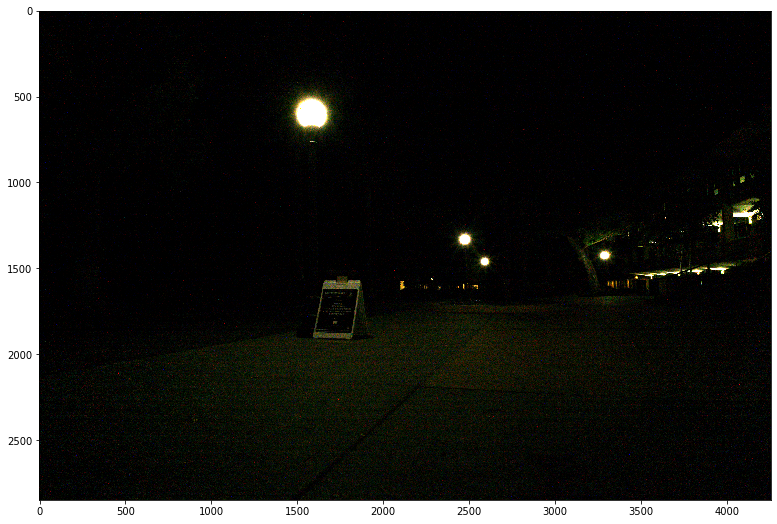

In [19]:
plt.figure(figsize=(16,9))
im_frame = PIL.Image.open('../Learning-to-See-in-the-Dark-master/result_Sony/final/10126_00_300_scale.png')
# np_frame = np.array(im_frame.getdata())
plt.imshow(im_frame)
plt.show()

## RAW from S7 dataset

uint8 (4032, 3024, 3)


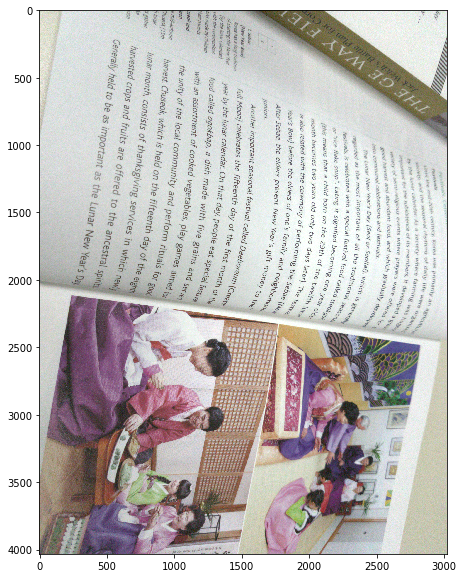

In [20]:
raw = rawpy.imread('../S7-ISP-Dataset/20161110_154341/medium_exposure.dng')
rgb = raw.postprocess(use_camera_wb=True)
print(rgb.dtype, rgb.shape)
plt.figure(figsize=(10,10))
plt.imshow(rgb)
raw.close()

uint8 (4032, 3024, 3)


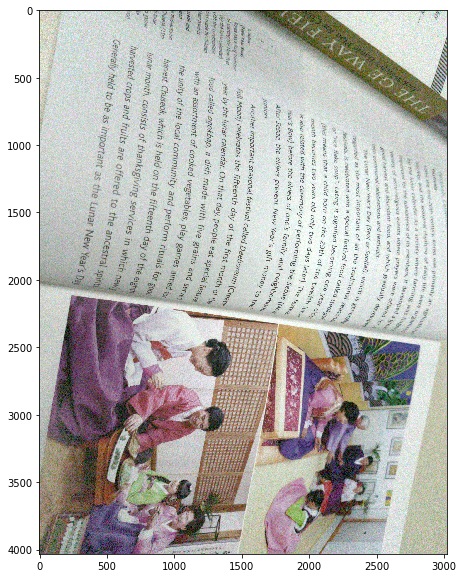

In [21]:
raw = rawpy.imread('../S7-ISP-Dataset/20161110_154341/short_exposure1.dng')
rgb = raw.postprocess(use_camera_wb=True)
print(rgb.dtype, rgb.shape)
plt.figure(figsize=(10,10))
plt.imshow(rgb)
raw.close()

uint8 (3024, 4032, 3)


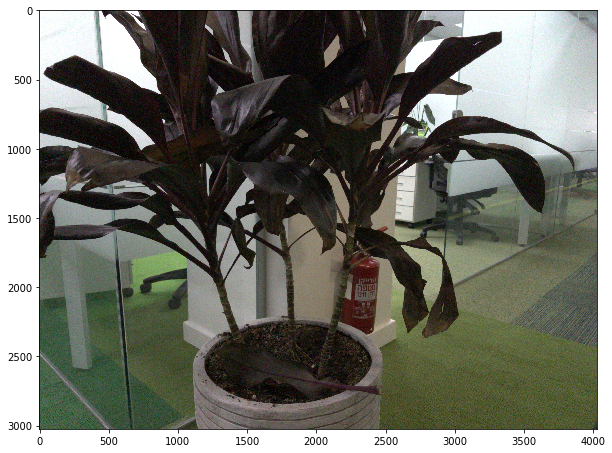

In [22]:
raw = rawpy.imread('../S7-ISP-Dataset/20161110_125007/medium_exposure.dng')
rgb = raw.postprocess(use_camera_wb=True)
print(rgb.dtype, rgb.shape)
plt.figure(figsize=(10,10))
plt.imshow(rgb)
raw.close()

uint8 (3024, 4032, 3)


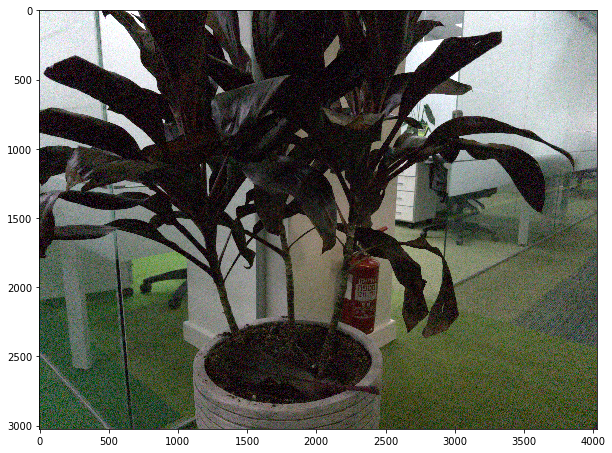

In [23]:
raw = rawpy.imread('../S7-ISP-Dataset/20161110_125007/short_exposure1.dng')
rgb = raw.postprocess(use_camera_wb=True)
print(rgb.dtype, rgb.shape)
plt.figure(figsize=(10,10))
plt.imshow(rgb)
raw.close()